## Практична робота №4
### Студентки групи МІТ-31 (підгрупа 2)
### Булгакової Анна

## Завдання на практичну роботу

1. **Завдання для бінарної класифікації (Binary Classification)**:
   - Використовуйте набір даних "classification_dataset.csv" для бінарної класифікації.
   - Розділіть дані на навчальний та тестовий набори.
   - Навчіть класифікатор (наприклад, логістичну регресію або метод опорних векторів) та оцініть його ефективність за допомогою метрик, таких як точність, відгук, F1-середнє і AUC-ROC.
   - Візуалізуйте матрицю плутанини та навчіться розпізнавати типи помилок.

2. **Завдання для мультикласової класифікації (Multiclass Classification)**:
   - Використовуйте набір даних "multiclass_dataset.csv" для мультикласової класифікації.
   - Розділіть дані на навчальний та тестовий набори.
   - Навчіть класифікатор (наприклад, Random Forest або нейронну мережу) та оцініть його ефективність за допомогою метрик, таких як точність, відгук, F1-середнє і матриця плутанини.
   - Порівняйте результати різних класифікаторів.

3. **Завдання для мультилейбл класифікації (Multilabel Classification)**:
   - Використовуйте набір даних "multilabel_dataset.csv" для мультилейбл класифікації.
   - Розділіть дані на навчальний та тестовий набори.
   - Навчіть класифікатор для прогнозування мультилейблів (наприклад, використовуючи багатошарову нейронну мережу) та оцініть його ефективність за допомогою метрик, таких як точність, відгук і F1-середнє для кожного лейбла.
   - Вивчайте, як класифікатори працюють з різними комбінаціями мультилейбів.

Для кожного завдання додатково використати різні моделі класифікації, налаштувати гіперпараметри, оцінити їхню ефективність та вивчити роботу з метриками якості та візуалізацією результатів.

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc, classification_report
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.multioutput import MultiOutputClassifier
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

завдання 1

In [4]:
data = pd.read_csv('classification_dataset.csv')

X = data.drop('Target', axis=1)
y = data['Target']

Найкращі гіперпараметри: {'max_iter': 100, 'penalty': 'l2'}
Accuracy: 0.88
Precision: 0.77
Recall: 1.00
F1 Score: 0.87
AUC-ROC: 0.93
Confusion Matrix:
[[18  5]
 [ 0 17]]


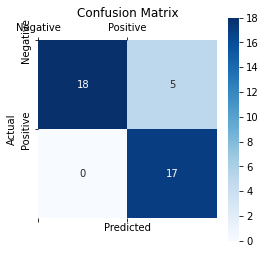

In [9]:
# Розділяємо дані на навчальні та тестові
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    'max_iter': [100, 200, 300, 400],
    'penalty': ['l1', 'l2'],
}

grid_search = GridSearchCV(estimator=LogisticRegression(random_state=42), param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_classifier = grid_search.best_estimator_
y_pred = best_classifier.predict(X_test)


# Виведення найкращих гіперпараметрів та результатів
best_params = grid_search.best_params_
print("Найкращі гіперпараметри:", best_params)


# Оцінка класифікатора за допомогою різних метрик
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, best_classifier.predict_proba(X_test)[:, 1])
confusion = confusion_matrix(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'AUC-ROC: {roc_auc:.2f}')
print(f'Confusion Matrix:\n{confusion}')

# Візуалізація матриці плутанини
plt.matshow(confusion)
sns.heatmap(confusion, annot=True, cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.yticks([0, 1], ['Negative', 'Positive'])
plt.show()

модель є дуже ефективною і має високі показники точності, відгуку та F1-середнього, а також високу AUC-ROC. Ця модель відмінно впоралася зі своєю задачею класифікації.

завдання 2

In [11]:
data = pd.read_csv('multiclass_dataset.csv')

X = data.drop('Target', axis=1)
y = data['Target']

Оцінки для логістичної регресії:
Оцінки для класифікатора LogisticRegression:
Точність: 0.65
Відгук: 0.65
F1-середнє: 0.6395368492224476
Матриця плутанини:
[[ 4  0  3  0]
 [ 5  2  0  1]
 [ 1  1 11  1]
 [ 0  1  1  9]]


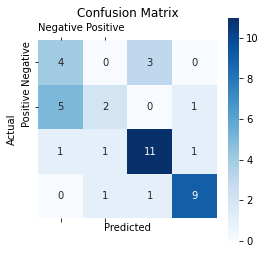

Оцінки для методу опорних векторів:
Оцінки для класифікатора SVC:
Точність: 0.7
Відгук: 0.7
F1-середнє: 0.6821635472370766
Матриця плутанини:
[[ 4  0  3  0]
 [ 5  2  0  1]
 [ 1  1 11  1]
 [ 0  0  0 11]]


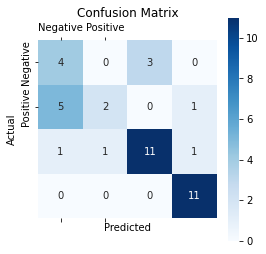

Оцінки для рішучих дерев:
Оцінки для класифікатора DecisionTreeClassifier:
Точність: 0.65
Відгук: 0.65
F1-середнє: 0.6496303467699349
Матриця плутанини:
[[5 1 1 0]
 [4 3 0 1]
 [3 0 9 2]
 [0 0 2 9]]


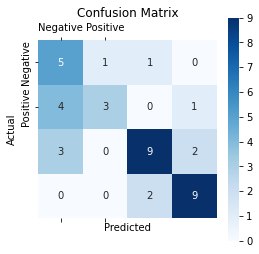

In [12]:
# розділяємо дані на навчальні та тестові
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# створення та навчання класифікаторів
clf_lr = LogisticRegression(C=1.0, penalty='l2', max_iter=1000, random_state=42)
clf_svm = SVC(C=1.0, kernel='linear', random_state=42)
clf_dt = DecisionTreeClassifier(max_depth=None, random_state=42)

clf_lr.fit(X_train, y_train)
clf_svm.fit(X_train, y_train)
clf_dt.fit(X_train, y_train)

# функція для оцінки метрик класифікатора
def evaluate_classifier(classifier, X_test, y_test):
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    print(f'Оцінки для класифікатора {type(classifier).__name__}:')
    print(f'Точність: {accuracy}')
    print(f'Відгук: {recall}')
    print(f'F1-середнє: {f1}')
    print('Матриця плутанини:')
    print(conf_matrix)
    
    # Візуалізація матриці плутанини
    plt.matshow(conf_matrix)
    sns.heatmap(conf_matrix, annot=True, cmap=plt.cm.Blues)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.xticks([0.5, 1.5], ['Negative', 'Positive'])
    plt.yticks([0.5, 1.5], ['Negative', 'Positive'])
    plt.show()

print("Оцінки для логістичної регресії:")
evaluate_classifier(clf_lr, X_test, y_test)

print("Оцінки для методу опорних векторів:")
evaluate_classifier(clf_svm, X_test, y_test)

print("Оцінки для рішучих дерев:")
evaluate_classifier(clf_dt, X_test, y_test)

Всі три класифікатори показали непогані результати на цьому наборі даних.  Логістична регресія найкращий результат, з найвищою точністю та F1-середнім. SVM та Дерева прийняття рішень дали показали подібні результати.

завдання 3

In [13]:
data = pd.read_csv('multilabel_dataset.csv')

X = data[['Feature1', 'Feature2', 'Feature3']]
y = data[['Label1', 'Label2', 'Label3', 'Label4']]

In [63]:
# розділяємо дані на навчальні та тестові
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

# налаштування гіперпараметрів
param_grid = {
    'estimator__n_estimators': [100, 200, 300],  # Кількість дерев у класифікаторі
    'estimator__max_depth': [3, 4, 5],  # Глибина дерева
    'estimator__learning_rate': [0.01, 0.1, 0.2]  # Швидкість навчання
}

# створюємо модель, шукаємо кращі гіперпараметри та навчаємо
clf = MultiOutputClassifier(XGBClassifier())
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Виведення найкращих гіперпараметрів та результатів
best_estimator = grid_search.best_estimator_
best_params = grid_search.best_params_
print("Найкращі гіперпараметри:", best_params)

y_pred = best_estimator.predict(X_test)

# оцінка точності та інші метрики
accuracy = accuracy_score(y_test, y_pred)
print(f'\nAccuracy on test data: {accuracy}')

report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{report}')

Найкращі гіперпараметри: {'estimator__learning_rate': 0.2, 'estimator__max_depth': 4, 'estimator__n_estimators': 100}

Accuracy on test data: 0.425
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.25      0.33         8
           1       0.74      0.70      0.72        20
           2       0.86      0.86      0.86        21
           3       0.68      0.59      0.63        22

   micro avg       0.75      0.66      0.70        71
   macro avg       0.69      0.60      0.64        71
weighted avg       0.73      0.66      0.69        71
 samples avg       0.71      0.62      0.64        71



Результати відносно не погані, але модель потребує покращення щодо точності та якості класифікації. Я вважаю, що у випадку мультилеблової класифікації краще використовувати нейроні мережі чим звичайні моделі мл, тому й такі результати, я експерепентувала з різними алгоритмами мл, але поки цей варіант дав найкращий результат